In [3]:
import pandas as pd
import numpy as np
import random
from faker import Faker

fake = Faker()
Faker.seed(42)
np.random.seed(42)

# Parameters
n = 200_000

# Bangalore-specific pools
areas = [
    "Koramangala", "Indiranagar", "Whitefield", "MG Road", "Jayanagar", "HSR Layout",
    "Rajajinagar", "Malleshwaram", "Banashankari", "BTM Layout", "Hebbal", "Yelahanka",
    "Electronic City", "Marathahalli", "Basavanagudi", "Frazer Town", "Ulsoor", "Bellandur"
]

restaurants = [
    "Truffles", "Empire Restaurant", "Meghana Foods", "Toit", "Sly Granny", "Biryani Pot",
    "Nagarjuna", "The Black Pearl", "Barbeque Nation", "Gilly's Restobar", "Koshy's",
    "Airlines Hotel", "MTR", "Savoury Restaurant", "Karavalli", "Corner House", "Chutney Chang"
]

cuisines = ['Indian', 'Chinese', 'Italian', 'Mexican', 'Thai', 'American', 'Middle Eastern']
payment_methods = ['UPI', 'Credit Card', 'Debit Card', 'Cash', 'Wallet']
genders = ['Male', 'Female', 'Other']
sentiments = ['Positive', 'Neutral', 'Negative']

# Generate data
data = {
    "Customer_ID": [fake.uuid4() for _ in range(n)],
    "Order_Date": [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n)],
    "Restaurant_Name": [random.choice(restaurants) for _ in range(n)],
    "Area": [random.choice(areas) for _ in range(n)],
    "Cuisine_Type": [random.choice(cuisines) for _ in range(n)],
    "Order_Value": np.round(np.random.normal(loc=350, scale=120, size=n), 2),
    "Delivery_Time_Min": np.random.randint(15, 90, size=n),
    "Delivery_Rating": np.random.randint(1, 6, size=n),
    "Food_Rating": np.random.randint(1, 6, size=n),
    "Payment_Method": [random.choice(payment_methods) for _ in range(n)],
    "Customer_Age": np.random.randint(18, 65, size=n),
    "Customer_Gender": [random.choice(genders) for _ in range(n)],
    "Sentiment": [random.choices(sentiments, weights=[0.6, 0.25, 0.15])[0] for _ in range(n)],
    "City": ["Bangalore"] * n
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("swiggy_data.csv", index=False)

print("✅ Bangalore-specific Swiggy dataset with 200,000 records saved as 'bangalore_swiggy_data.csv'")


✅ Bangalore-specific Swiggy dataset with 200,000 records saved as 'bangalore_swiggy_data.csv'


In [2]:
%pip install faker


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 13.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data Cleaning
import pandas as pd

# Load dataset
df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\swiggy customer beh & sentiment analysis\\swiggy_data.csv')

df.head(10)



,Customer_ID,Order_Date,Restaurant_Name,Area,Cuisine_Type,Order_Value,Delivery_Time_Min,Delivery_Rating,Food_Rating,Payment_Method,Customer_Age,Customer_Gender,Sentiment,City
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-12-25 04:47:16,Karavalli,BTM Layout,Chinese,409.61,59,3,2,Wallet,20,Male,Positive,Bangalore
1,23b8c1e9-3924-46de-beb1-3b9046685257,2025-07-09 13:47:45,Corner House,Basavanagudi,Italian,333.41,57,5,5,UPI,43,Female,Negative,Bangalore
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,2024-12-30 19:14:11,MTR,Banashankari,Thai,427.72,51,5,3,Credit Card,18,Other,Negative,Bangalore
3,972a8469-1641-4f82-8b9d-2434e465e150,2025-02-08 06:04:40,Savoury Restaurant,Banashankari,Chinese,532.76,22,2,2,Wallet,60,Male,Positive,Bangalore
4,17fc695a-07a0-4a6e-8822-e8f36c031199,2024-06-20 15:49:26,Empire Restaurant,Basavanagudi,Italian,321.90,37,3,2,Credit Card,28,Other,Positive,Bangalore
5,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2024-03-04 19:27:40,Meghana Foods,Indiranagar,Mexican,321.90,22,2,5,UPI,62,Other,Neutral,Bangalore
6,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,2024-04-02 12:48:21,Savoury Restaurant,Rajajinagar,Thai,539.51,89,4,2,Debit Card,27,Other,Positive,Bangalore
7,6b65a6a4-8b81-48f6-b38a-088ca65ed389,2024-06-07 17:28:07,Karavalli,Banashankari,Mexican,442.09,19,3,3,Debit Card,26,Male,Neutral,Bangalore
8,47378190-96da-4dac-b2ff-5d2a386ecbe0,2024-06-27 16:33:53,Corner House,Jayanagar,Thai,293.66,82,1,3,Debit Card,34,Male,Positive,Bangalore
9,c241330b-01a9-471f-9e8a-774bcf36d58b,2025-06-14 12:15:45,Toit,Koramangala,Middle Eastern,415.11,71,1,3,Cash,20,Male,Neutral,Bangalore


In [6]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_ID        200000 non-null  object 
 1   Order_Date         200000 non-null  object 
 2   Restaurant_Name    200000 non-null  object 
 3   Area               200000 non-null  object 
 4   Cuisine_Type       200000 non-null  object 
 5   Order_Value        200000 non-null  float64
 6   Delivery_Time_Min  200000 non-null  int64  
 7   Delivery_Rating    200000 non-null  int64  
 8   Food_Rating        200000 non-null  int64  
 9   Payment_Method     200000 non-null  object 
 10  Customer_Age       200000 non-null  int64  
 11  Customer_Gender    200000 non-null  object 
 12  Sentiment          200000 non-null  object 
 13  City               200000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 21.4+ MB


In [8]:
df.describe()

,Order_Value,Delivery_Time_Min,Delivery_Rating,Food_Rating,Customer_Age
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,350.116869,51.865370,2.999420,2.998650,40.956475
std,119.990480,21.601804,1.413725,1.415369,13.573010
min,-185.870000,15.000000,1.000000,1.000000,18.000000
25%,269.110000,33.000000,2.000000,2.000000,29.000000
50%,350.200000,52.000000,3.000000,3.000000,41.000000
75%,431.130000,70.000000,4.000000,4.000000,53.000000
max,897.450000,89.000000,5.000000,5.000000,64.000000


In [ ]:
# handle negative or unrealtic order values
df=df[df['Order_Value']>0]

In [10]:
# cap age to realistic range
df=df[(df["Customer_Age"]>=18)&(df["Customer_Age"]<=65)]

In [11]:
# convert Order Date to Datetime
df["Order_Date"]=pd.to_datetime(df["Order_Date"])

In [12]:
# reset index
df.reset_index(drop=True,inplace=True)

In [13]:
# DATA QUALITY CHECKS

In [ ]:
# CHECK FOR MISSING VALUES
print(df.isnull().sum())

# basic stats
print(df.describe())

# unique values per column
print(df.nunique())



Customer_ID          0
Order_Date           0
Restaurant_Name      0
Area                 0
Cuisine_Type         0
Order_Value          0
Delivery_Time_Min    0
Delivery_Rating      0
Food_Rating          0
Payment_Method       0
Customer_Age         0
Customer_Gender      0
Sentiment            0
City                 0
dtype: int64
                          Order_Date    Order_Value  Delivery_Time_Min  \
count                         199647  199647.000000      199647.000000   
mean   2024-08-09 15:27:23.245418240     350.794942          51.865448   
min              2023-08-10 08:14:25       0.150000          15.000000   
25%       2024-02-09 02:48:44.500000     269.680000          33.000000   
50%              2024-08-09 13:43:59     350.480000          52.000000   
75%              2025-02-07 23:51:18     431.240000          70.000000   
max              2025-08-09 19:44:20     897.450000          89.000000   
std                              NaN     118.999594          21.602704   

In [3]:
df.to_csv("cleaned_swiggy.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_ID        200000 non-null  object 
 1   Order_Date         200000 non-null  object 
 2   Restaurant_Name    200000 non-null  object 
 3   Area               200000 non-null  object 
 4   Cuisine_Type       200000 non-null  object 
 5   Order_Value        200000 non-null  float64
 6   Delivery_Time_Min  200000 non-null  int64  
 7   Delivery_Rating    200000 non-null  int64  
 8   Food_Rating        200000 non-null  int64  
 9   Payment_Method     200000 non-null  object 
 10  Customer_Age       200000 non-null  int64  
 11  Customer_Gender    200000 non-null  object 
 12  Sentiment          200000 non-null  object 
 13  City               200000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 21.4+ MB


In [16]:
# DATA EXPLORATION AND VISUALIZATION

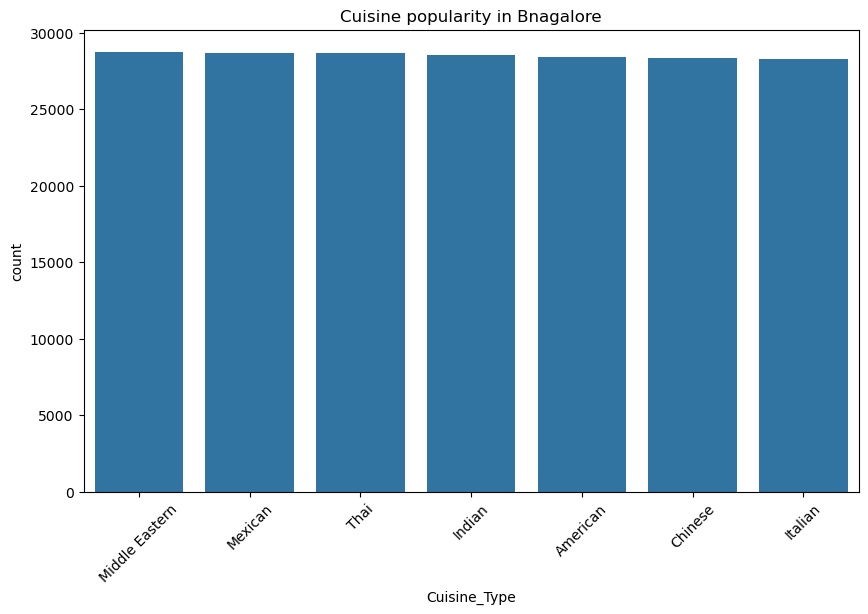

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#  cuisine popularity
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Cuisine_Type",order=df["Cuisine_Type"].value_counts().index)
plt.title("Cuisine popularity in Bnagalore")
plt.xticks(rotation=45)
plt.show()

C:\Users\Dhusyath\AppData\Local\Temp\ipykernel_7788\4208689527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment",palette="Set2")


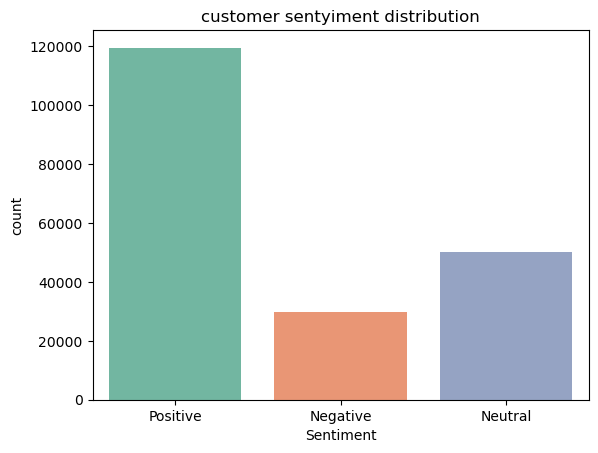

In [22]:
# sentiment distribution
sns.countplot(data=df, x="Sentiment",palette="Set2")
plt.title("customer sentyiment distribution")
plt.show()


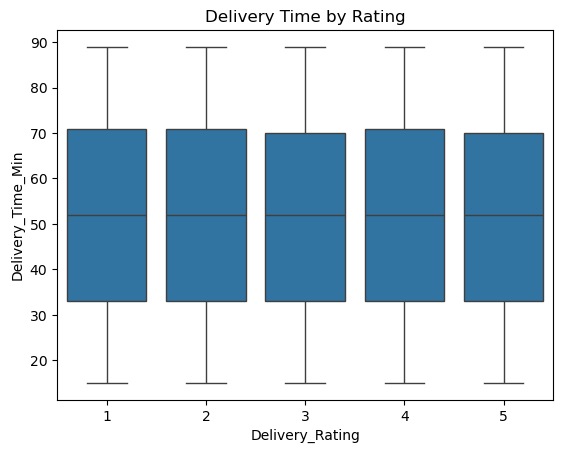

In [23]:
# Delivery time vs rating
sns.boxplot(data=df, x="Delivery_Rating", y="Delivery_Time_Min")
plt.title("Delivery Time by Rating")
plt.show()

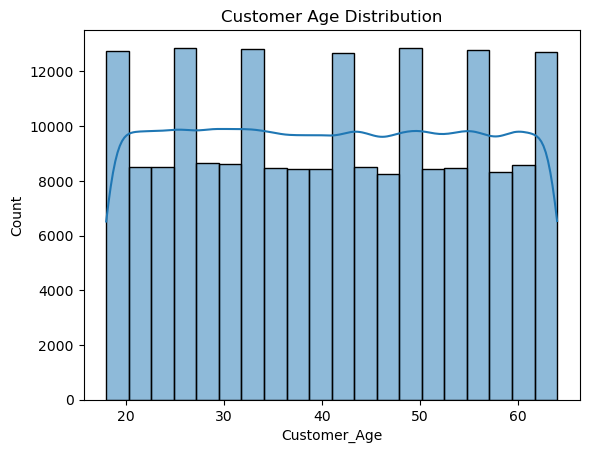

In [24]:
# Age distribution
sns.histplot(df["Customer_Age"], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

In [26]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset
df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\swiggy customer beh & sentiment analysis\\swiggy_data.csv')

# ✅ Select features used in the Streamlit app
features = ["Order_Value", "Delivery_Time_Min", "Delivery_Rating", "Food_Rating", "Customer_Age"]
X = df[features]

# 🎯 Target variable: Sentiment (0 = Negative, 1 = Neutral, 2 = Positive)
y = df["Sentiment"]  # Make sure this column exists and is encoded as 0/1/2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
pickle.dump(model, open("rf_model.pkl", "wb"))
print("✅ Model trained and saved as rf_model.pkl")


✅ Model trained and saved as rf_model.pkl
